Library

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Polinom Lagrange

In [11]:
def lagrange_interpolation(x, y, xi):
    def L(k, xi):
        Lk = 1
        for j in range(len(x)):
            if j != k:
                Lk *= (xi - x[j]) / (x[k] - x[j])
        return Lk

    yi = 0
    for k in range(len(x)):
        yi += y[k] * L(k, xi)
    return yi

Polinom Newton

In [12]:
def newton_interpolation(x, y, xi):
    def divided_diff(x, y):
        n = len(y)
        coef = np.zeros([n, n])
        coef[:, 0] = y
        for j in range(1, n):
            for i in range(n - j):
                coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])
        return coef[0, :]

    coef = divided_diff(x, y)
    yi = coef[0]
    for i in range(1, len(coef)):
        term = coef[i]
        for j in range(i):
            term *= (xi - x[j])
        yi += term
    return yi

Display Hasil

In [13]:
def hasil_interpolasi(x, y):
    xi = np.linspace(5, 40, 10)  # Choose 10 points between 5 and 40 for demonstration
    print(f"{'xi':^10}{'Lagrange yi':^20}{'Newton yi':^20}")
    print("="*50)
    for xi_i in xi:
        yi_lagrange = lagrange_interpolation(x, y, xi_i)
        yi_newton = newton_interpolation(x, y, xi_i)
        print(f"{xi_i:<10.2f}{yi_lagrange:<20.2f}{yi_newton:<20.2f}")

Hasil Graph

In [14]:
def grafik_hasil(x, y):
    xi = np.linspace(5, 40, 100)
    yi_lagrange = [lagrange_interpolation(x, y, xi_i) for xi_i in xi]
    yi_newton = [newton_interpolation(x, y, xi_i) for xi_i in xi]

    plt.figure(figsize=(12, 6))
    plt.plot(x, y, 'o', label='Data')
    plt.plot(xi, yi_lagrange, label='Interpolasi Lagrange')
    plt.plot(xi, yi_newton, label='Interpolasi Newton', linestyle='--')
    plt.xlabel('Tegangan (kg/mm²)')
    plt.ylabel('Waktu Patah (jam)')
    plt.legend()
    plt.title('Interpolasi Lagrange and Newton')
    plt.show()

Data

In [15]:
# Dataset from the screenshot
x = [5, 10, 15, 20, 25, 30, 35, 40]
y = [40, 30, 25, 40, 18, 20, 22, 15]


Display

    xi        Lagrange yi          Newton yi      
5.00      40.00               40.00               
8.89      44.21               44.21               
12.78     16.42               16.42               
16.67     34.17               34.17               
20.56     38.69               38.69               
24.44     20.39               20.39               
28.33     14.65               14.65               
32.22     27.73               27.73               
36.11     12.69               12.69               
40.00     15.00               15.00               


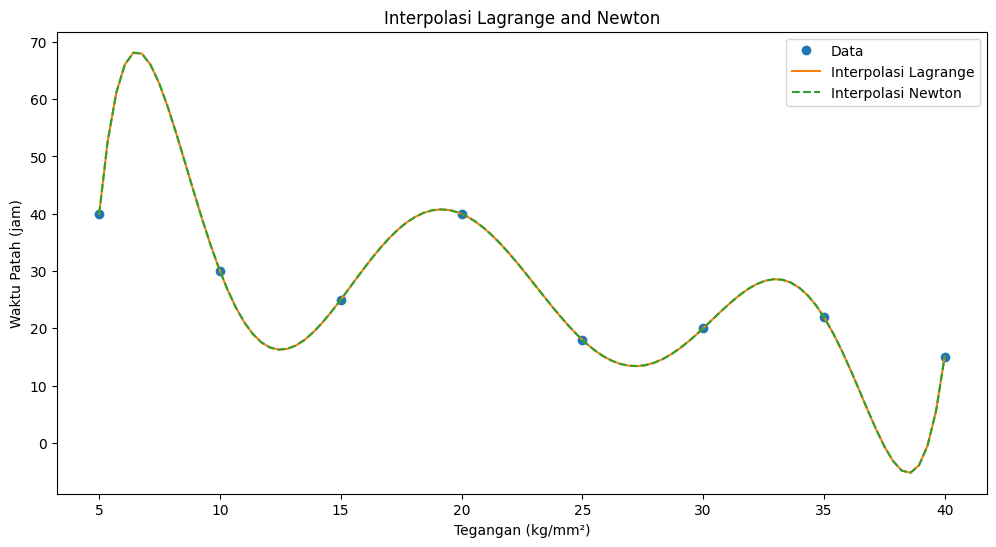

In [16]:
hasil_interpolasi(x, y)
grafik_hasil(x, y)